In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will first import the csv file

In [49]:
df = pd.read_csv(r"C:\Users\jjjib\Desktop\Projects\DataTrained\Week 3\titanic_train.csv")

Let us look into the dataset 

In [50]:
df.columns #Looking into all the columns of the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
df.head() #Now, we see a basic data of the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.shape #Check the shape of the dataset

(891, 12)

In [53]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
df.describe() #Statistical representation of the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here, we note that some data is missing from the age column. Let us look into the null values

In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, we see that there are null values present in 3 columns namely, 'age', 'cabin' and 'embarked'. From the datatype code we see that age is a float type so we fill the null values with the mean data. However, as for the embarked and the cabin feature, they both are object/string type. It is highly beneficial is we delete the cabin column as large portion of value is missing in it, as for the case of embarked feature let us just drop the two missing columns.

In [56]:
df.drop(columns=['Cabin'], inplace=True)      #Dropping the column cabin
df.dropna(subset=['Embarked'], inplace=True)  #Dropping the rows containing null embarked values

In [57]:
df["Age"].fillna(value=df["Age"].mean(), inplace=True) #Filling null value with mean

In [58]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now, since the missing data has been dealt with, let us do a better visualisation of the data

In [59]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

We can see that only 340 passengers managed to survive

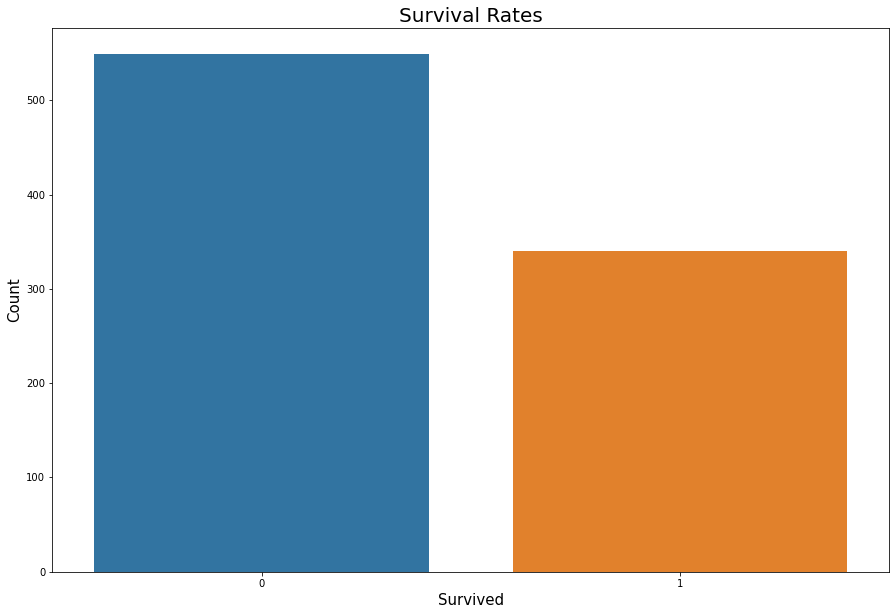

In [60]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', data = df)
plt.title('Survival Rates', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

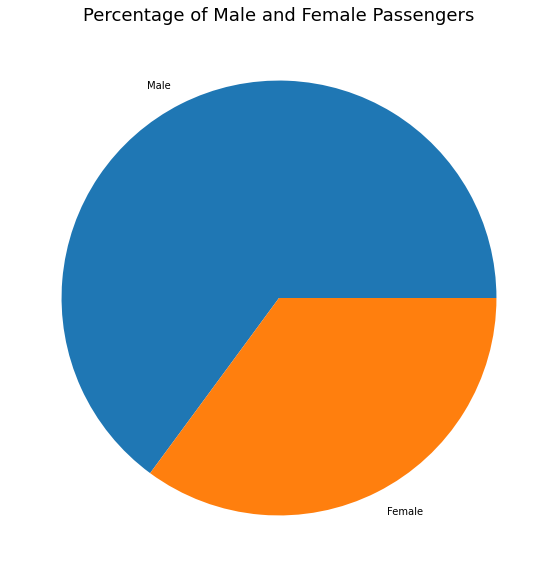

In [61]:
plt.figure(figsize = (15, 10))
plt.pie([(df.Sex == 'male').sum(), (df.Sex == 'female').sum()], labels = ["Male", "Female"])
plt.title('Percentage of Male and Female Passengers', fontsize = 18)
plt.show()

In [62]:
df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

Majority of the passengers aboard the Titanic were Male.
Let us now take a look at the Survival Rates for Male and Female passengers.

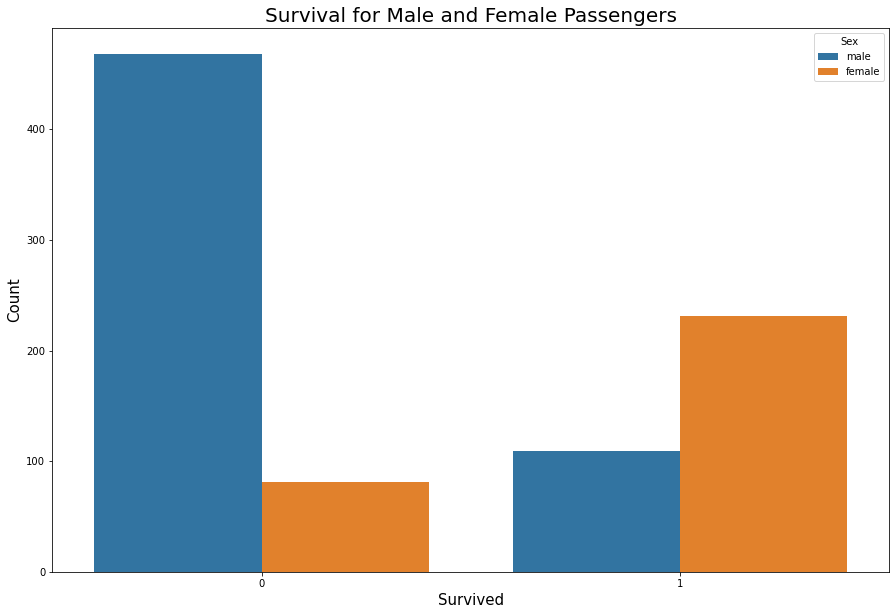

In [63]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Sex', data = df)
plt.title('Survival for Male and Female Passengers', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

We see that:
    1. Most of the Male passengers have not survived.
    2. Majority of the Female passengers have survived.

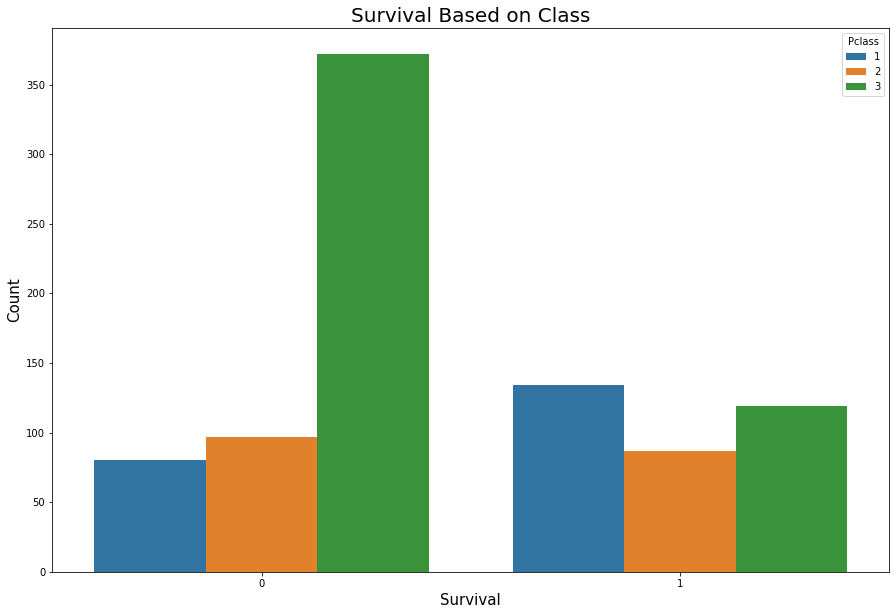

In [64]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = df)
plt.title('Survival Based on Class', fontsize = 20)
plt.xlabel('Survival', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

Passengers in the 3rd class have a much higher mortality rate as compared to the other two classes.
The 1st class has a higher number of passengers that survived

<Figure size 1080x720 with 0 Axes>

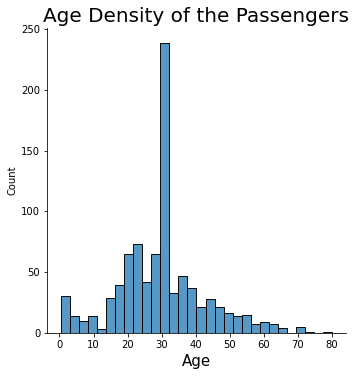

In [65]:
plt.figure(figsize = (15, 10))
sns.displot(df['Age'])
plt.title('Age Density of the Passengers', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.show()

Majority of the passengers on the Titanic were between 20 to 40 years of age

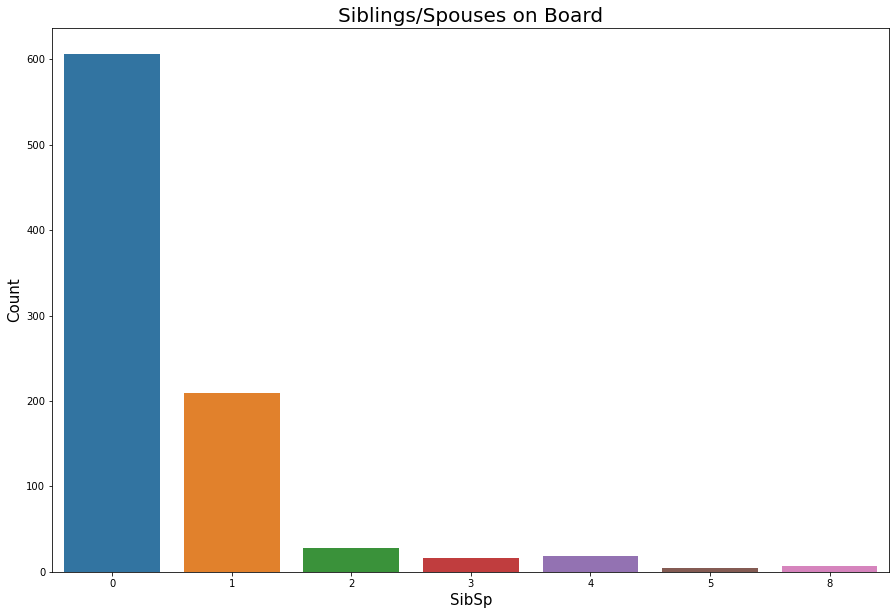

In [66]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'SibSp', data = df)
plt.title('Siblings/Spouses on Board', fontsize = 20)
plt.xlabel('SibSp', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

SibSp indicates the number of Siblings or Spouses on board.
From the countplot we see that most of the passengers were travelling alone.

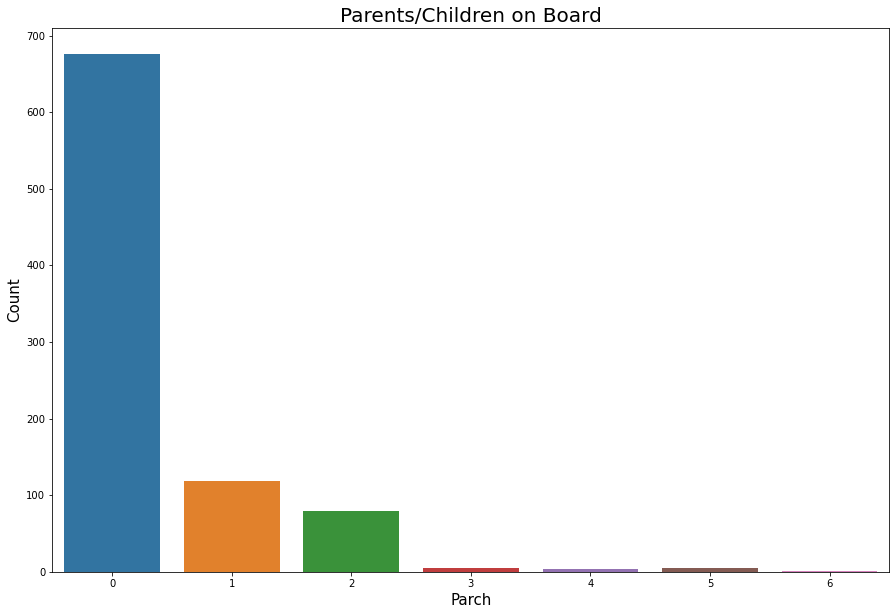

In [67]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Parch', data = df)
plt.title('Parents/Children on Board', fontsize = 20)
plt.xlabel('Parch', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

Parch indicates the number of Parents or Children aboard the ship.
We can observe that most of the people are travelling on their own.

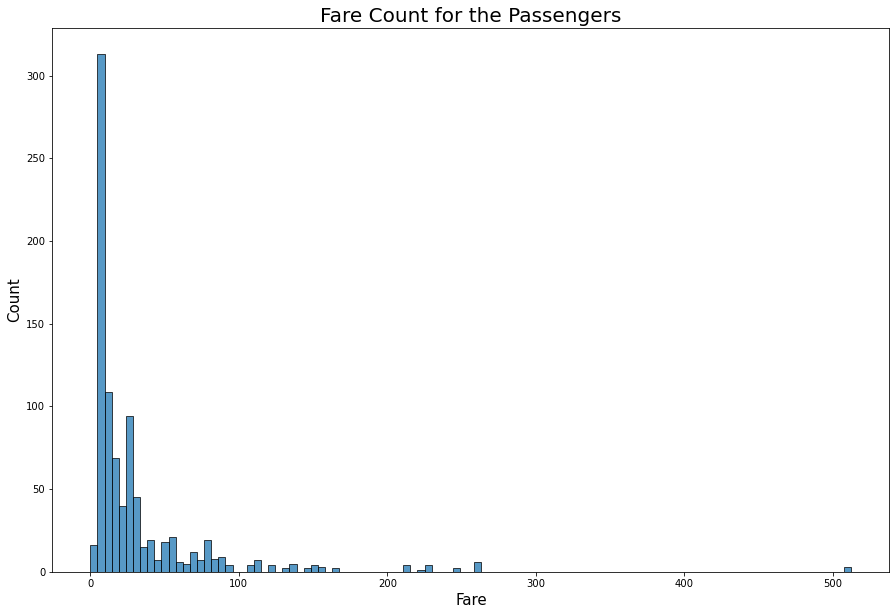

In [68]:
plt.figure(figsize = (15, 10))
sns.histplot(df['Fare'])
plt.title('Fare Count for the Passengers', fontsize = 20)
plt.xlabel('Fare', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

Now, since we have a better visualisation of the data. Let us create a new feature called 'IsAlone' that tells us if the passenger is travelling solo or with a family.

In [69]:
df['IsAlone'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


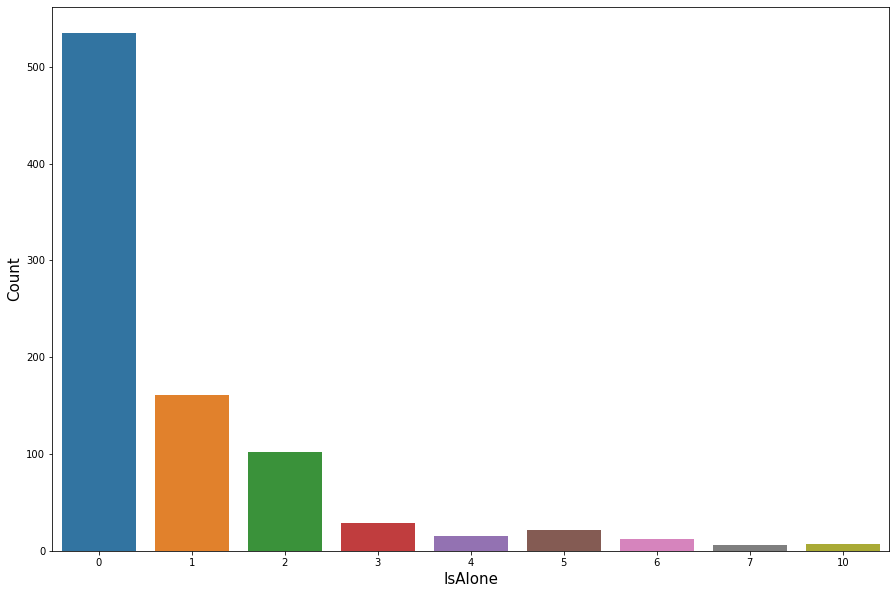

In [70]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'IsAlone', data = df)
plt.xlabel('IsAlone', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

As we can observe from the IsAlone feature most passengers are travelling by themselves, without any family.

For a simpler view let the classify the 'IsAlone' feature into categorical view of 'Alone' and 'NotAlone'

In [71]:
df['IsAlone'] = [0 if x == 0 else 1 for x in df['IsAlone']]

In [72]:
df['IsAlone'].value_counts()

0    535
1    354
Name: IsAlone, dtype: int64

We created 2 groups for the IsAlone feature.

The first group is 0 and contains passengers travelling alone.
The second group 1 is for passengers having one or more family member.

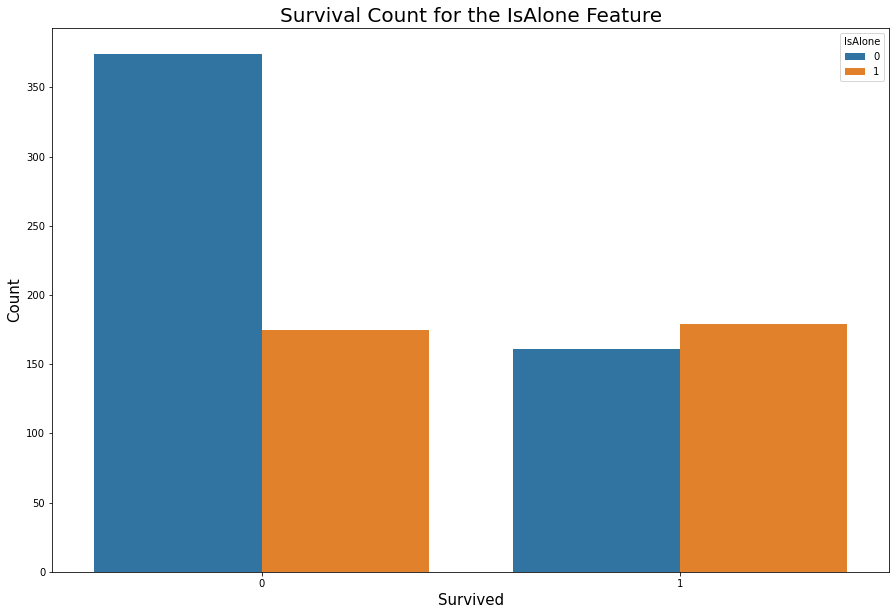

In [73]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'Survived', hue = 'IsAlone', data = df)
plt.title('Survival Count for the IsAlone Feature', fontsize = 20)
plt.xlabel('Survived', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

Passengers that travelled alone have a higher mortality than passengers that travelled with family.
The survival chances for passengers that travelled alone and those that travelled with family is almost the same.

We see that out data is mostly balanced. We move forward to the engineering part of the data

In [74]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis = 1, inplace = True)

We dropped the following columns as it does not provide to the taget variable of the data.

Let us now look into the data at hand

In [75]:
df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0


Let us look into the null values again before moving forward with the modeling

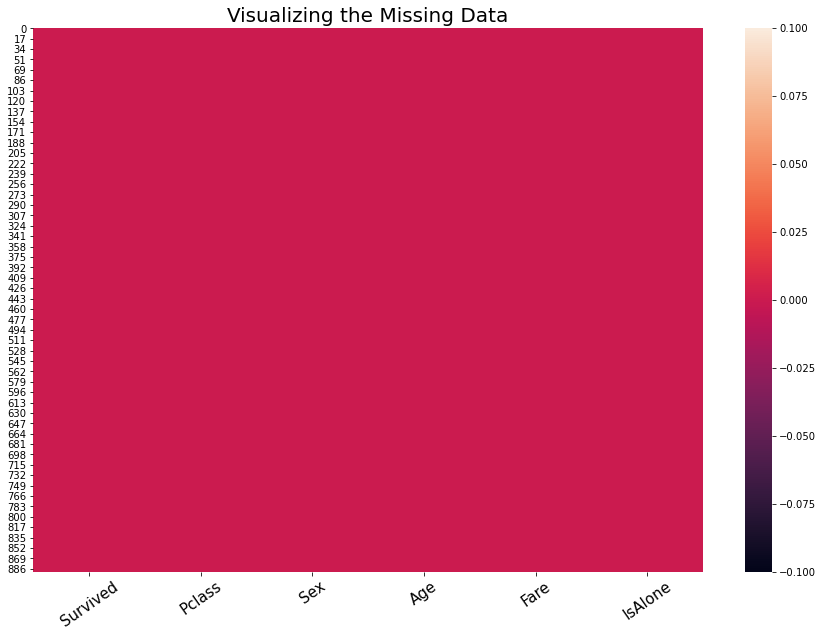

In [76]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.isna())
plt.title("Visualizing the Missing Data", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 15)
plt.show()

We see that there are no missing values. Let us move forward with the correlation matrix for the data

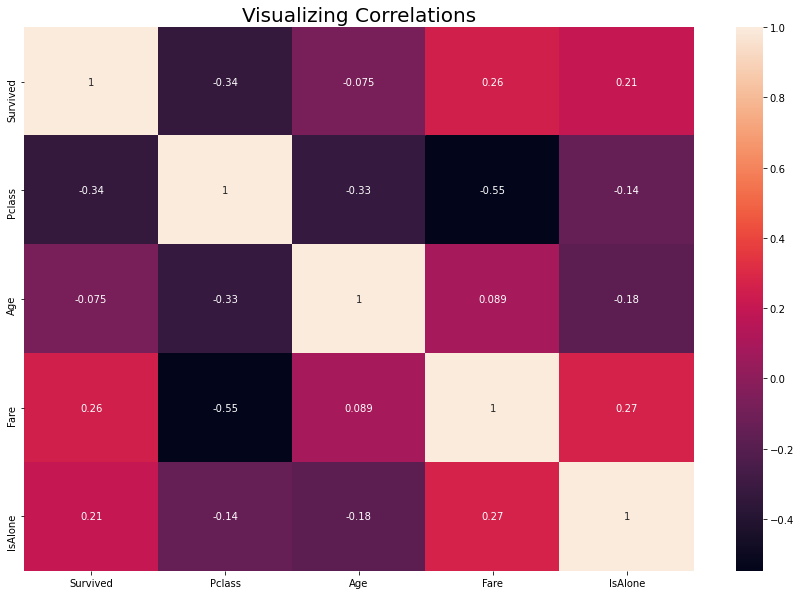

In [77]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

Since all the correlation is within the limit of 0.5

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
lc = LabelEncoder()
df['Sex'] = lc.fit_transform(df['Sex'])

In [80]:
df['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

Let us now split the dataset into target and feature variables

In [81]:
df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0


In [82]:
x = df.iloc[:, 1:]
y = df['Survived']

Let us first scale the data before putting into the models

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = scaler.fit_transform(x)

Now, the data is ready for modelling and now we find the best random state

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

We find the best random state to best fit the model

In [85]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print(maxAccu, maxRS)

0.8539325842696629 69


Now since we got the best random state for data modelling, we create the test train models

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=69)

# Logistic Regression

In [87]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 85.39325842696628
[[110  12]
 [ 14  42]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       122
           1       0.78      0.75      0.76        56

    accuracy                           0.85       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178



# K-Nearest Neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 87.64044943820225
[[111  11]
 [ 11  45]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       122
           1       0.80      0.80      0.80        56

    accuracy                           0.88       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.88      0.88      0.88       178



# Support Vector Classifier

In [92]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 85.95505617977528
[[117   5]
 [ 20  36]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       122
           1       0.88      0.64      0.74        56

    accuracy                           0.86       178
   macro avg       0.87      0.80      0.82       178
weighted avg       0.86      0.86      0.85       178



# Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 79.7752808988764
[[101  21]
 [ 15  41]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       122
           1       0.66      0.73      0.69        56

    accuracy                           0.80       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.80      0.80      0.80       178



# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 85.39325842696628
[[107  15]
 [ 11  45]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       122
           1       0.75      0.80      0.78        56

    accuracy                           0.85       178
   macro avg       0.83      0.84      0.83       178
weighted avg       0.86      0.85      0.86       178



# Cross Validation

we do a cross validation to check the best fit model

In [96]:
from sklearn.model_selection import cross_val_score 

In [97]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.7851710785247255


In [100]:
scr2 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.8087792801371168


In [101]:
scr3 = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC is: \t", scr3.mean())

Cross validation score of SVC is: 	 0.812181806640005


In [102]:
scr4 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr4.mean())

Cross validation score of Decision Tree is: 	 0.7739160794769251


In [103]:
scr5 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr5.mean())

Cross validation score of Random Forest is: 	 0.8110455151399734


We can see that SVC performs the best among others

# Hyper Parameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [106]:
gcv=GridSearchCV(svc,parameters,cv=5,scoring='accuracy')

In [107]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [108]:
gcv.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [109]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy : 0.8031517777996651


# ROC AUC Plot

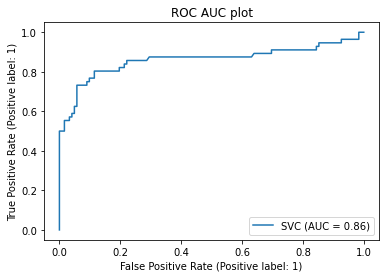

In [110]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

We got the AUC score of 86% which is very good

In [111]:
import joblib
joblib.dump(gcv.best_estimator_,"Titanic.pkl")

['Titanic.pkl']